In [ ]:
import numpy as np
import matplotlib.pyplot as plt

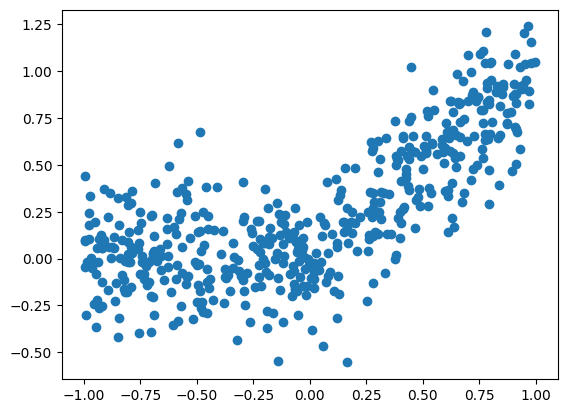

In [ ]:
#Generacion de muestras

X = np.random.uniform(-1, 1, 500)

#r(x)
r_X = np.zeros_like(np.arange(500.0))

r_X[X<0] = 0;
r_X[X>=0] = X[X>=0]

#Genero la normal con media r_X y sigma^2 0.04
Y_X = np.random.normal(r_X, np.sqrt(0.04))


plt.scatter(X, Y_X)

#Analisis Teorico

##Calculos de la esperanza y varianza

Dado que

$X \sim U(-1,1)$

Se sabe que

$E[X] = \frac{1 - 1}{2} = 0 \quad Var(X) = \frac{(1+1)^2}{12} = \frac{1}{3}$



Para Y se puede usar esperanza condicional y la ley de varianza total

$E[Y] = E[E[Y|X]] = E[r(X)] = E[X\;\mathbb{1}\{X>0\}] = \int_0^1 {x \, f(x) \,dx} = \frac{1}{2}\,\frac{1}{2} = \frac{1}{4}$

$Var(Y) = E[Var(Y|X)] + Var(E[Y|X]) = 0.04 + Var(r(X)) = 0.04 + E[r(X)^2] - E[r(X)]^2 = 0.04 - \frac{1}{16} + E[X^2 \mathbb{1}\{X>0\}] = -0.0225 + \int_0^1 {x^2 \, f(x) \,dx} = -0.0225 + \frac{1}{6} = 0.1442$

El mismo principio puede usarse para calcular la media de XY

$E[XY] = E[X\,E[Y|X]] = E[X\,r(X)] = \frac{1}{6}$

##Regresor optimo y el error bayesiano

El regresor optimo está definido por la esperanza de Y condicionada por X = x

$E[Y|X = x] = r(x)$

Por otro lado, el error bayesiano es:

$E[Var(Y|X)] = 0.04$

##Predictor sin conocer nada de X

En caso de no concer valores de X, el mejor estimador de Y es lógicamente su esperanza, que ya fue calculada como $\frac14$

El error esperado sería:

$E[(E[Y] - Y)^2] = Var(Y) = 0.1442$

Se observa que este error es significativamente mayor que cuando se conoce X, lo cual tiene sentido dado que en este ultimo caso (conociendo X) se cuenta con más información.




In [ ]:
class RegLineal:
    def __init__(self):
        self.params = np.array([[0.0], [0.0]])
        self.error = 0
        self.hist_w = []

    def fit(self, X, Y):
        #Se añade la columna de 1's a los datos brindados
        X = np.hstack((np.ones((500,1)), X))

        #Se calculan los parámetros a partir de la pseudoinversa
        self.params = (np.linalg.inv(X.T@X)@X.T)@Y

    def fit_gradient(self, X, Y, learning_rate, iter):
        #iter es la cantidad de iteraciones para realizar el gradiente descendiente
        #Se añade la columna de 1's
        X_ext = np.hstack((np.ones((500,1)), X))
        for i in range(0, iter):
            #Cálculo del gradiente de J
            grad_J = (2*X_ext.T@X_ext@self.params - 2*X_ext.T@Y)/len(Y)
            #Paso de gradiente descendiente
            self.params = self.params - learning_rate * grad_J
            #Guardo el valor de w en un vector para graficar despues
            self.hist_w.append(self.params[1])




    def predict(self, X):
        #Uso la formula del regresor lineal
        return self.params[1] * X + self.params[0]

    def err_predict(self, X, Y):
        #Calculo del error cuadrático medio
        return np.mean((Y - self.predict(X))**2)


[b, w]: [[0.25538314]
 [0.46865603]]
Error de entrenamiento: 0.06418089108618406
Potencia esperada para 0.5 de irradiancia: [0.48971116]


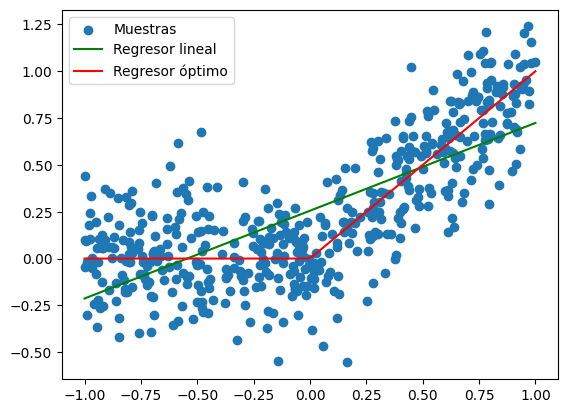

In [ ]:
reg = RegLineal();
X = X.reshape((500,1))
Y_X = Y_X.reshape((500,1))

#Obtengo los parámetros
reg.fit(X, Y_X)

#Parametros obtenidos
print("[b, w]: " + str(reg.params))

#Error de entrenamiento
print("Error de entrenamiento: " + str(reg.err_predict(X,Y_X)))

#Prediccion para 0.5 de irradiancia
y_pred = reg.predict([0.5])

print("Potencia esperada para 0.5 de irradiancia: " + str(y_pred))

#Graficos
#El regresor optimo es r(X), el obtenido es el regresor lineal, defino un vector de irradiancias:

x = np.linspace(-1,1,100)
y = reg.predict(x)

r_x = np.zeros_like(np.arange(100.0))

r_x[x<0] = 0;
r_x[x>=0] = x[x>=0]

plt.scatter(X, Y_X)
plt.plot(x, y, 'g')
plt.plot(x, r_x, 'r')

plt.legend(['Muestras', 'Regresor lineal', 'Regresor óptimo'])

#El resultado del regresor lineal es logico dada la alinealidad de r(x) al ser una función partida en el 0

[b, w]: [[0.25538314]
 [0.46865577]]
Error de entrenamiento: 0.06418089108620807
Potencia esperada para 0.5 de irradiancia: [0.48971103]


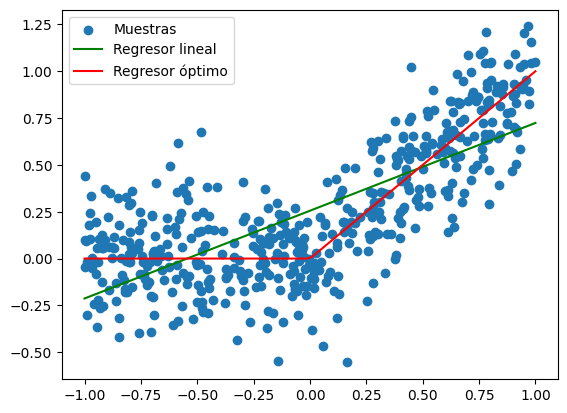

In [ ]:
reg_grad = RegLineal()


#Entreno el modelo por gradiente
reg_grad.fit_gradient(X, Y_X, 0.1, 200)

#Parametros
print("[b, w]: " + str(reg_grad.params))

#Imprimo el error de entrenamiento
print("Error de entrenamiento: " + str(reg_grad.err_predict(X,Y_X)))

#Prediccion de la potencia con 0.5 de irradiancia

y_pred = reg_grad.predict([0.5])

print("Potencia esperada para 0.5 de irradiancia: " + str(y_pred))

#Graficos
#Se observa que la regresion por gradiente da similar a aquella obtenida matricialmente
x = np.linspace(-1,1,100)
y = reg_grad.predict(x)

r_x = np.zeros_like(np.arange(100.0))

r_x[x<0] = 0;
r_x[x>=0] = x[x>=0]

plt.scatter(X, Y_X)
plt.plot(x, y, 'g')
plt.plot(x, r_x, 'r')

plt.legend(['Muestras', 'Regresor lineal', 'Regresor óptimo'])

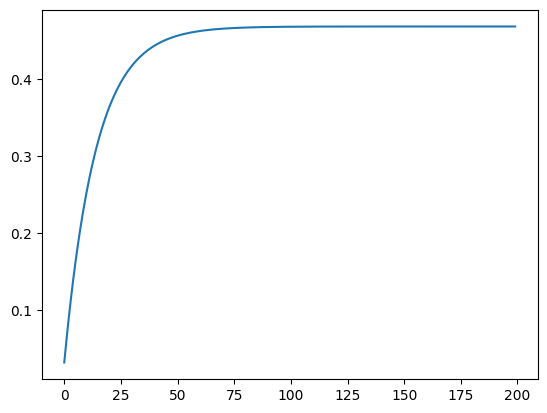

In [ ]:
#Ploteo la pendiente w en funcion del numero de iteración, se observa la convergencia

plt.plot(reg_grad.hist_w)